In [66]:
!pip install kagglehub

In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("START-UMD/gtd")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Navya sree\.cache\kagglehub\datasets\START-UMD\gtd\versions\3


In [68]:
import os
print("START-UMD/gtd")
print(os.listdir(path))

START-UMD/gtd
[]


In [85]:
import pandas as pd

csv_path = os.path.join(path, "globalterrorismdb_0718dist.csv") # Construct full path to the CSV
df = pd.read_csv(csv_path, encoding='ISO-8859-1', low_memory=False) # Load with encoding (important to avoid errors)
df.head() # Preview the data of first five rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [87]:
df.shape # Shape of the dataset

(181691, 135)

In [89]:
df.info() # provides a concise summary of the DataFrame, including the number of non-null entries, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [91]:
df.describe() # to generate summary statistics of a DataFrame’s numeric columns

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
# Create a proper 'date' column
# Drop rows where iyear, imonth, or iday are missing before converting to datetime
df.dropna(subset=['iyear', 'imonth', 'iday'], inplace=True)
# Convert to datetime, ensuring the format is correct after converting to int
df['date'] = pd.to_datetime(df['iyear'].astype(str) + df['imonth'].astype(str) + df['iday'].astype(str), format='%Y%m%d', errors='coerce')

# Drop unnecessary columns
df.drop(['eventid', 'approxdate', 'resolution'], axis=1, inplace=True, errors='ignore')

# Replace placeholder values (-9, -99, etc.) with NaN
df.replace([-9, -99, -999], pd.NA, inplace = True)

In [94]:
# View top outliers
df[['nkill', 'nwound']].describe()

# Cap extremely high casualties (e.g., anything over 1000) or flag them
df['nkill'] = df['nkill'].clip(upper=1000)
df['nwound'] = df['nwound'].clip(upper=1000)

In [95]:
# Check how many exact duplicates there are
print("Duplicates:", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

Duplicates: 4551


<Axes: title={'center': 'Terrorist Attacks Over Time'}, xlabel='year'>

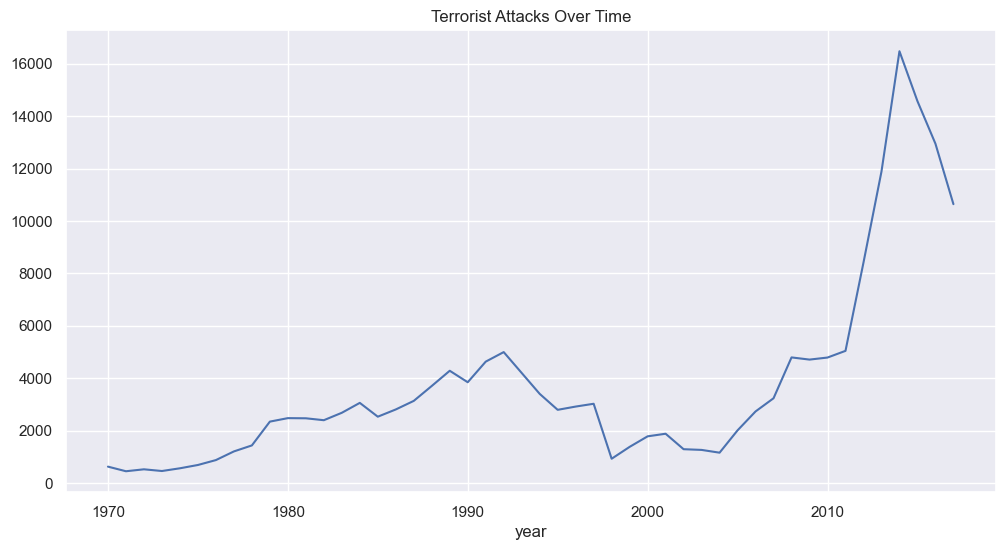

In [96]:
# Trend Over Time line graph
df['year'] = df['date'].dt.year
df.groupby('year').size().plot(kind='line', title='Terrorist Attacks Over Time')

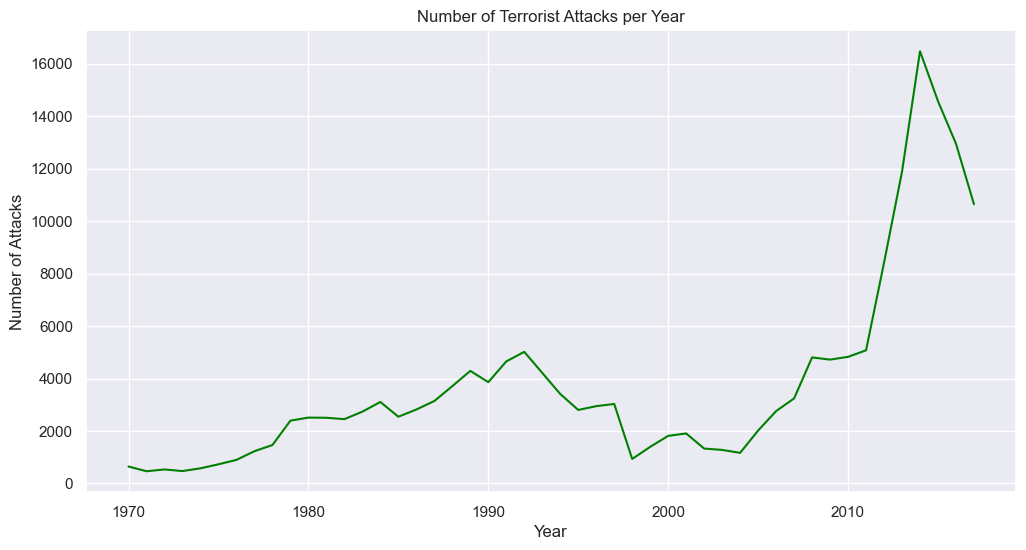

In [97]:
# line plot for number of Terrorist Attacks per Year
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of attacks each year and sort by year
attacks_by_year = df['iyear'].value_counts().sort_index()

# Set figure size
plt.figure(figsize=(12,6))

# Plot a line graph of attacks per year
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values, color="green")

# Set title and axis labels
plt.title("Number of Terrorist Attacks per Year")  # Graph title
plt.xlabel("Year")                                 # X-axis label
plt.ylabel("Number of Attacks")                    # Y-axis label

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


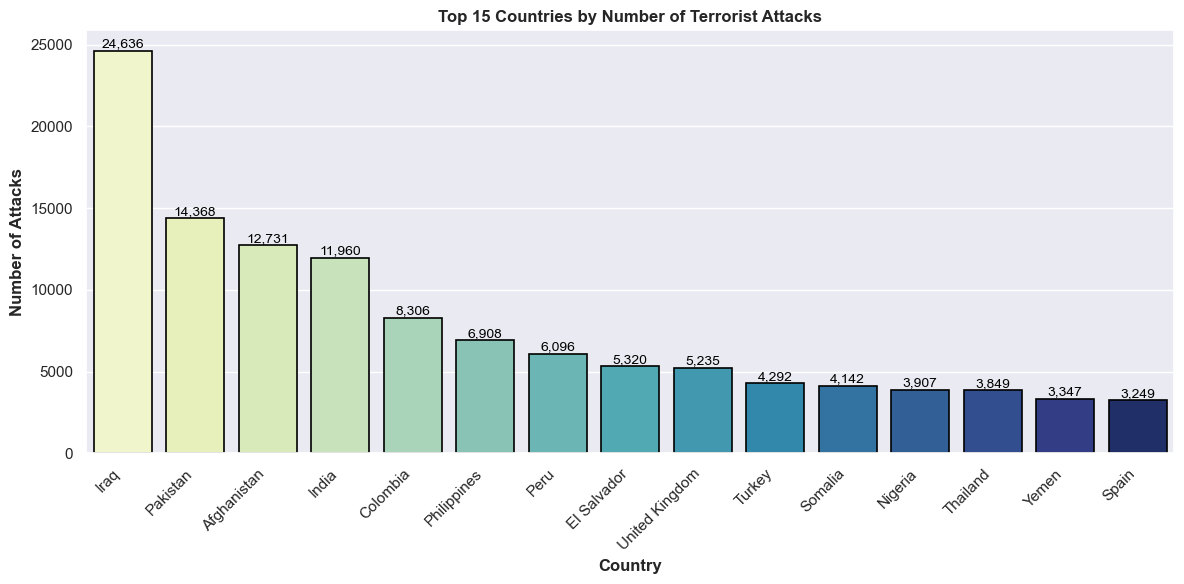

In [98]:
# Bar plot for Top 15 Countries with Number of Terrorist Attacks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Top 15 countries with most attacks
# Prepare a DataFrame for plotting
top_df = top_countries.reset_index()
top_df.columns = ['Country', 'Attacks']

# Create the vertical barplot with hue and palette
ax = sns.barplot(
    data=top_df,
    x='Country',
    y='Attacks',
    hue='Country',         # Add this to assign each country a different color
    palette='YlGnBu',
    dodge=False,           # Prevent bars from being side-by-side
    legend=False           # Hide the legend
)


# Add black borders to the bars
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.2)

# Add value labels on top of each bar
for i, value in enumerate(top_countries.values):
    ax.text(
        i,                 # x-position (index of the bar)
        value + 200,       # y-position (slightly above the bar)
        f"{value:,}",      # formatted value
        ha='center',
        fontsize=10,
        color='black'
    )

# Titles and labels
plt.title("Top 15 Countries by Number of Terrorist Attacks", fontweight='bold')
plt.xlabel("Country", fontweight='bold')
plt.ylabel("Number of Attacks", fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

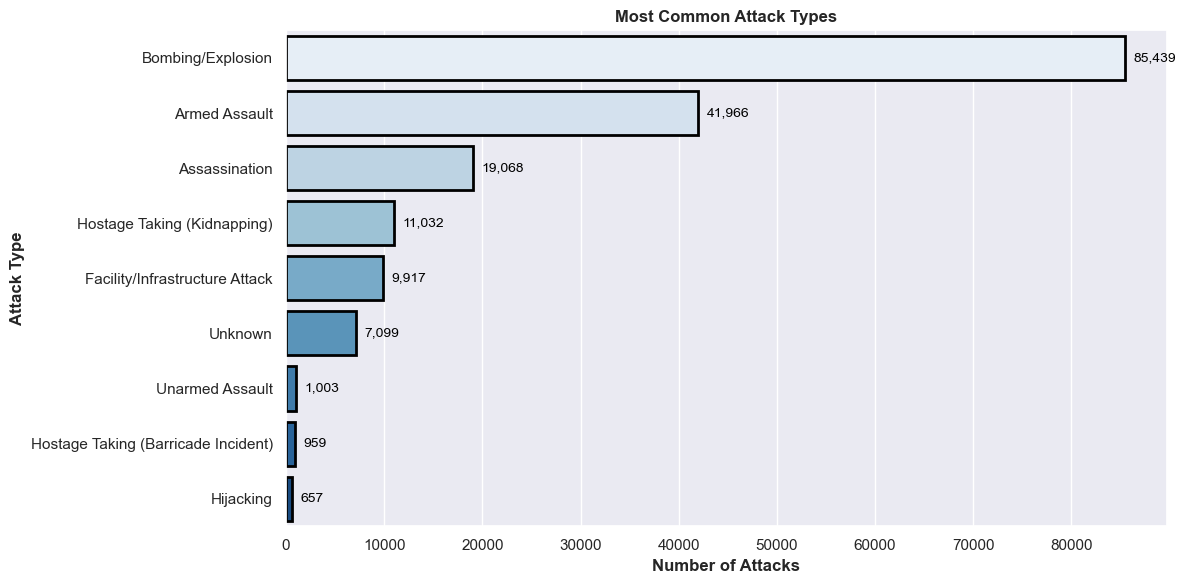

In [99]:
# horizontal bar plot of "Top 10 Most Frequent Types of Terrorist Attacks Worldwide with number of attacks"
 
# Prepare data
attack_types = df['attacktype1_txt'].value_counts().head(10)
attack_df = attack_types.reset_index()
attack_df.columns = ['Attack Type', 'Number of Attacks']

# Set style
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Create the barplot
ax = sns.barplot(
    data=attack_df,
    x='Number of Attacks',
    y='Attack Type',
    hue='Attack Type',          # Required for proper palette use
    palette="Blues",
    edgecolor='black',
    linewidth=2,
    dodge=False,                # Prevent bars from separating
    legend=False                # Hide the legend
)

# Add value labels to each bar
for i, value in enumerate(attack_df['Number of Attacks']):
    ax.text(
        value + max(attack_df['Number of Attacks']) * 0.01,  # Small offset to the right
        i, 
        f"{value:,}", 
        va='center', 
        fontsize=10, 
        color='black'
    )

# Add titles and labels
plt.title("Most Common Attack Types", fontweight='bold')
plt.xlabel("Number of Attacks", fontweight='bold')
plt.ylabel("Attack Type", fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# horizontal bar plot of "Most Common Target Typesn with number of attacks"

# Prepare data
target_types = df['targtype1_txt'].value_counts().head(10)
target_df = target_types.reset_index()
target_df.columns = ['Target Type', 'Number of Attacks']

# Set visual style
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Create barplot with hue to avoid FutureWarning
ax = sns.barplot(
    data=target_df,
    x='Number of Attacks',
    y='Target Type',
    hue='Target Type',            # to avoid warning
    palette="mako",
    edgecolor='black',
    linewidth=2,
    dodge=False,                  # avoid bar splitting
    legend=False                  # hide legend
)

# Add value labels on bars
for i, value in enumerate(target_df['Number of Attacks']):
    ax.text(
        value + max(target_df['Number of Attacks']) * 0.01,  # slight offset right
        i,
        f"{value:,}",  # formatted number with commas
        va='center',
        fontsize=10,
        color='black'
    )

# Labels and title
plt.title("Most Common Target Types", fontweight='bold')
plt.xlabel("Number of Attacks", fontweight='bold')
plt.ylabel("Target Type", fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# line graph of "Total Casualties (Killed + Wounded) per Year"


# Convert the 'nkill' column to numeric type; any non-numeric values will be replaced with NaN (Not a Number)
df['nkill'] = pd.to_numeric(df['nkill'], errors='coerce')

# Convert the 'nwound' column to numeric type in the same way as 'nkill'
df['nwound'] = pd.to_numeric(df['nwound'], errors='coerce')

# Create a new column 'casualties' by summing 'nkill' and 'nwound'; NaN values are replaced with 0 before summing
df['casualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)

# Group the data by year ('iyear') and calculate the total number of casualties for each year
casualties_per_year = df.groupby('iyear')['casualties'].sum()

# Plot a red line chart showing total casualties per year
sns.lineplot(x=casualties_per_year.index, y=casualties_per_year.values, color='red')

# Set the title of the plot with bold font to describe what the plot represents
plt.title("Total Casualties (Killed + Wounded) per Year", fontweight='bold')

# Label the x-axis as "Year" with bold text
plt.xlabel("Year", fontweight='bold')

# Label the y-axis as "Number of Casualties" with bold text
plt.ylabel("Number of Casualties", fontweight='bold')

# Display the plot
plt.show()


In [ ]:
#"Correlation Heatmap"

corr_df = df[['nkill', 'nwound', 'casualties', 'extended', 'suicide', 'multiple']].copy()
corr = corr_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()


In [ ]:
# Correlation Heatmap of attacks by year vs region

heat_data = pd.crosstab(df['year'], df['region_txt'])
sns.heatmap(heat_data, cmap='YlGnBu')
plt.title("Correlation Heatmap of attacks by year vs region", fontweight='bold')
plt.show()

In [ ]:
!pip install folium

In [ ]:
# Import the folium library to create interactive maps using Leaflet.js in Python
import folium

''' Import the MarkerCluster plugin from folium to group nearby markers together 
into clusters, making the map more readable and interactive when there are many points'''
from folium.plugins import MarkerCluster

''' Import the display function from IPython to render and show the folium map 
 directly in Jupyter notebooks or compatible environments'''
from IPython.display import display


In [ ]:
# "Deadly Terrorist Attacks Worldwide (More than 50 Killed)"


import plotly.express as px

# Drop rows with missing values in crucial columns
filtered_df = df.dropna(subset=['latitude', 'longitude', 'nkill'])

# Filter attacks where more than 50 people were killed
deadly_df = filtered_df[filtered_df['nkill'] > 50]

# Create an interactive geo-scatter plot
fig = px.scatter_geo(
    deadly_df,
    lat='latitude',              # Latitude for geographic location
    lon='longitude',             # Longitude for geographic location
    color='nkill',               # Color scale based on number of people killed
    size='nkill',                # Bubble size based on fatalities
    hover_name='country_txt',    # Country name on hover
    hover_data=['city', 'attacktype1_txt', 'nkill', 'nwound'],  # Extra details
    title='Deadly Terrorist Attacks (More than 50 Killed)',
    color_continuous_scale='blues',  # Color gradient
    projection='natural earth',      # World map projection
    template='plotly_dark'           # Dark theme
)

# Update layout for better appearance
fig.update_layout(
    legend_title_text='Number Killed',
    margin=dict(l=0, r=0, t=50, b=0),  # Reduce margins
    geo=dict(
        showland=True,
        landcolor="lightgray",        # Light color for land
        showocean=True,
        oceancolor="lightblue"        # Light color for ocean
    )
)

# Show the interactive map
fig.show()


In [ ]:
# "Geographical Distribution of Terrorist Attacks by Region"


import plotly.express as px
px.scatter(df, x='longitude', y='latitude', color='region_txt', hover_name='country_txt')